In [7]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

In [8]:

class SGD:

    """확률적 경사 하강법（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 

            
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


In [9]:

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [10]:
def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


============== 1/16 ==============
epoch:0 | 0.105 - 0.117


/home/doyoung/deeplearning/deep_book/fromscratch/common/functions.py:56: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
/home/doyoung/deeplearning/deep_book/fromscratch/common/multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/home/doyoung/deeplearning/deep_book/fromscratch/common/multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/home/doyoung/deeplearning/deep_book/fromscratch/common/functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
/home/doyoung/deeplearning/deep_book/fromscratch/common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.122
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.181
epoch:4 | 0.097 - 0.21
epoch:5 | 0.097 - 0.234
epoch:6 | 0.097 - 0.24
epoch:7 | 0.097 - 0.261
epoch:8 | 0.097 - 0.28
epoch:9 | 0.097 - 0.289
epoch:10 | 0.097 - 0.312
epoch:11 | 0.097 - 0.323
epoch:12 | 0.097 - 0.351
epoch:13 | 0.097 - 0.375
epoch:14 | 0.097 - 0.38
epoch:15 | 0.097 - 0.389
epoch:16 | 0.097 - 0.411
epoch:17 | 0.097 - 0.424
epoch:18 | 0.097 - 0.435
epoch:19 | 0.097 - 0.452
============== 2/16 ==============
epoch:0 | 0.094 - 0.128


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


epoch:1 | 0.097 - 0.106
epoch:2 | 0.097 - 0.138
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.167
epoch:5 | 0.097 - 0.179
epoch:6 | 0.097 - 0.208
epoch:7 | 0.097 - 0.233
epoch:8 | 0.097 - 0.247
epoch:9 | 0.097 - 0.266
epoch:10 | 0.097 - 0.294
epoch:11 | 0.097 - 0.302
epoch:12 | 0.097 - 0.326
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.367
epoch:15 | 0.097 - 0.389
epoch:16 | 0.097 - 0.405
epoch:17 | 0.097 - 0.418
epoch:18 | 0.097 - 0.437
epoch:19 | 0.097 - 0.456
============== 3/16 ==============
epoch:0 | 0.116 - 0.079
epoch:1 | 0.327 - 0.161
epoch:2 | 0.455 - 0.213
epoch:3 | 0.545 - 0.245
epoch:4 | 0.605 - 0.286
epoch:5 | 0.67 - 0.32
epoch:6 | 0.728 - 0.363
epoch:7 | 0.75 - 0.397
epoch:8 | 0.8 - 0.426
epoch:9 | 0.836 - 0.446
epoch:10 | 0.859 - 0.477
epoch:11 | 0.877 - 0.508
epoch:12 | 0.891 - 0.533
epoch:13 | 0.902 - 0.562
epoch:14 | 0.922 - 0.572
epoch:15 | 0.923 - 0.594
epoch:16 | 0.936 - 0.608
epoch:17 | 0.942 - 0.621
epoch:18 | 0.951 - 0.635
epoch:19 | 0.955 - 0.64
============== 

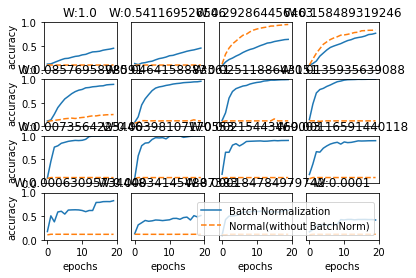

In [11]:


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()
